In [1]:
## Imports

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np
import seaborn as sns
import scipy.stats as stats


ModuleNotFoundError: No module named 'scipy'

## a) The Birthday Problem

I truly did not see a reason to use the datetime module, I guess we can do it by picking a year and generating random dates using timedelta and then checking for duplicates?
It seemed to me like an additional step that would bring us to the same results

Overview of what I did:

- Defined initial parameters (group size, n of simulations, seed)
- made a big for loop that makes the calculation run for each group size. (N is now the size of the group)
- made the smaller for loop that runs 300 times, in which it picks N number of birthdays at random
- then it's fairly simple, I use set() and len() to compare unique vs total bdays
- since we are only concerned with the probability that AT least two people share a birthday (1 pair):
  - I just sum +1 to the counter.
- repeat for all 300 simulations, and then avg for our estimate. 

In [2]:
#Initial parameters
n_sizes = [10,20,30]
n_sims = 300
np.random.seed(12345)

for N in n_sizes:

  count_atleast2 = 0
  
  for i in range(n_sims):

    bdays = np.random.randint(low = 1 , high = 366, size = N)   # Im assuming 365 days (366 bc high is exclusive)

    unique_bdays = set(bdays)

    if len (unique_bdays) < len(bdays):
      count_atleast2 += 1

  prob_calc_percent = (count_atleast2/n_sims)*100
  print(f'with a group size of {N}, over {n_sims} simulations,\nthe probability of AT LEAST 2 people sharing a birthday is estimated to be {prob_calc_percent:.1f}%')    
  print ('----------\n')

with a group size of 10, over 300 simulations,
the probability of AT LEAST 2 people sharing a birthday is estimated to be 12.7%
----------

with a group size of 20, over 300 simulations,
the probability of AT LEAST 2 people sharing a birthday is estimated to be 43.3%
----------

with a group size of 30, over 300 simulations,
the probability of AT LEAST 2 people sharing a birthday is estimated to be 69.3%
----------



# b) Visuual insight of the CLT

I first wanted to use one of the preloaded datasets within the seaborn library, yet after finding the one I wanted (something with a bimodal distribution), I found that the sample size is not THAT big (270ish)

Since I still liked the idea of using a bimodal distb for CLT, I  create my own combining normal distributions

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


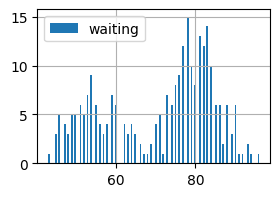

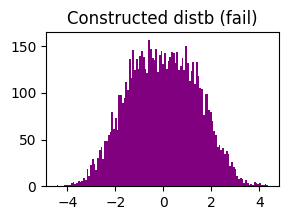

In [3]:
# Inspecting seaborn datasets....
print(sns.get_dataset_names())
geyser_df = sns.load_dataset('geyser')
geyser_df['waiting'].hist(bins= 120, figsize= (3,2), legend= True) # We can see the bimodal distb
len(geyser_df['waiting']) # Here I found the 272 observations


# Setting everything up for the constructed bimodal distb.

peak1, peak2 = stats.norm.rvs(loc = -1, size = 4000), stats.norm.rvs(loc = 1, size = 4000)
bimodal_distb = np.concatenate([peak1,peak2])
plt.figure(figsize=(3, 2))
plt.hist(bimodal_distb, bins = 120, color= 'purple')
plt.title('Constructed distb (fail)')
plt.show()
# an issue I ran into for rushing the calculation... centering of the normal distributions are really close together which gives me well, that.

## Another attempt, now not having the bimodals so close together

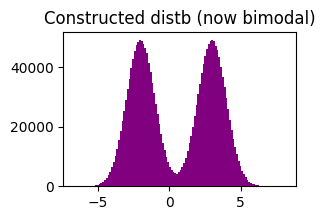

In [4]:
# Now again, with spaced out values
peak1, peak2 = stats.norm.rvs(loc = -2, size = 1000000), stats.norm.rvs(loc = 3, size = 1000000)
true_bimodal = np.concatenate([peak1,peak2])
plt.figure(figsize=(3, 2))
plt.hist(true_bimodal, bins = 120, color= 'purple')
plt.title('Constructed distb (now bimodal)')
plt.show()

# We now got a distribution that looks like the twin towers. Let's get to it.

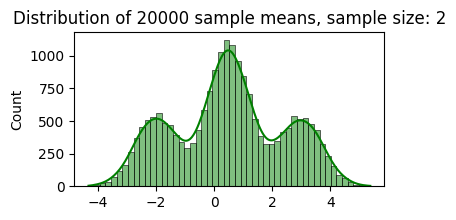

H0: Data is normally distributed, p-value 0.000
--------------------------------



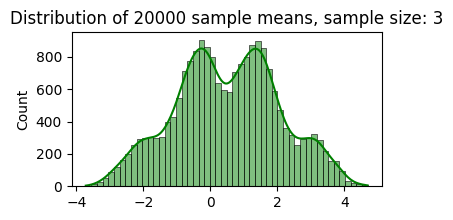

H0: Data is normally distributed, p-value 0.000
--------------------------------



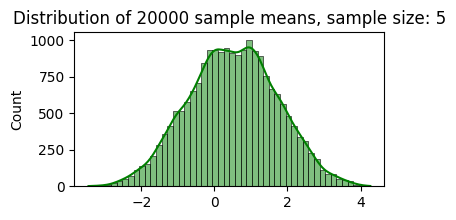

H0: Data is normally distributed, p-value 0.000
--------------------------------



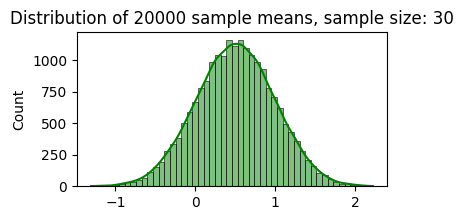

H0: Data is normally distributed, p-value 0.039
--------------------------------



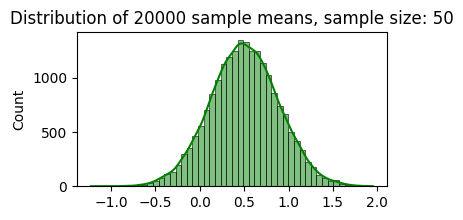

H0: Data is normally distributed, p-value 0.919
--------------------------------

Observe how p-value goes from outright reject H0 to not rejecting it, i.e. no evidence to say data is not normal


In [5]:
# Gathering random samples from the bimodal distribution

N_simulations = 20000     # Setting fixed sims
sample_sizes = [2, 3, 5, 30, 50] # Using sample sizes 

list_of_lists = []   # List to store the sample means distributions

for N in sample_sizes: # loop through list of samples sizes to test

  sample_means = [] # current iteration sample means
  

  for i in range(N_simulations): #loop 2k times
      
      sample = np.random.choice(true_bimodal, size= N, replace = True) #with replacement, because we extract independent distbs
      sample_means.append(sample.mean())   
    
  list_of_lists.append(sample_means) # sample mean distribution for a given sample size loaded into list of lists

for i, case in enumerate(list_of_lists):       ## quicker plotting

  plt.figure(figsize=(4,2))
  sns.histplot(case, kde=True, bins=50, color = 'green')
  plt.title(f'Distribution of {N_simulations} sample means, sample size: {sample_sizes[i]}')
  plt.show()
  normal_test_result = stats.normaltest(case)                                       # Using the pvalue from this test to 'measure' the CLT principle
  print(f'H0: Data is normally distributed, p-value {normal_test_result[1]:.3f}')  
  print('--------------------------------\n')

print ('Observe how p-value goes from outright reject H0 to not rejecting it, i.e. no evidence to say data is not normal')

# c) The first success

- Well, we can see that the higher the probability of sucess, the higher the chance of getting the first success early on
- As seen in the plots, we can see the density for different cases, and how each time it concentrates more towards the first few attempts rather than having mild geometric decay


### Mathematical Expression

For an attempt number a, the probability that the first success is on that attempt is:


$P(X = a) = (1-p)^{a-1} \times p$


This is because these trials are independent, so for example, if we want a sequence head, tails, tails, then it's probability is $p(heads) \times p(tails) \times p(tails)$

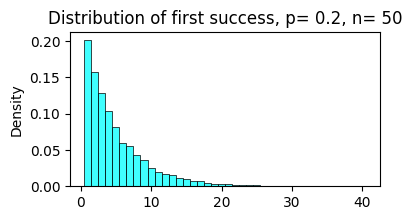

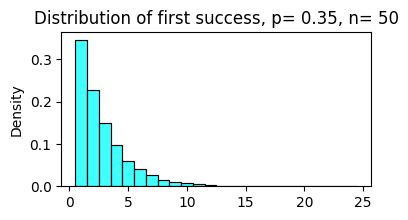

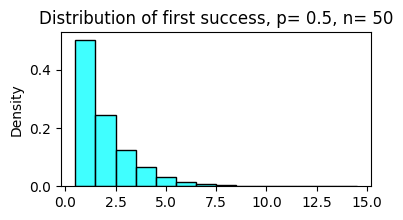

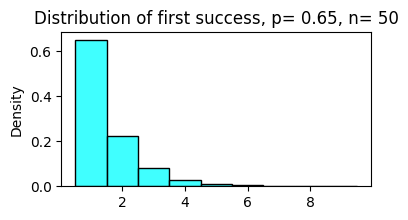

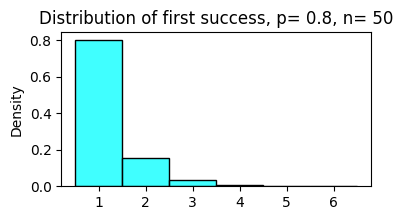

In [6]:
# Setup

p_success= [0.2, 0.35, 0.5, 0.65, 0.8]
n_trials = 50
n_sims = 10000
list_of_experiments = []


# loops
for p_case in p_success:

  first_success_flips = []

  for sim in range(n_sims):                                   ##  Mistake/confusion i had:
    flips = np.random.binomial(1, p_case, size = n_trials) ##  I used args (n_trials, p_success, 1), which just gave me the number of successes instead of an array [0,0,1,0] etc.
    success_indices = np.where(flips == 1)[0]                 ## Another head scratcher was the double [0] in these
    first_success_index = success_indices[0] + 1              # +1 due to 0-based indexing
    first_success_flips.append(first_success_index)           # I ignore the case where there is no success because of large n_trials
  
  list_of_experiments.append(first_success_flips)



for i, data in enumerate(list_of_experiments):       ## recycled code from b)

  plt.figure(figsize=(4,2))
  sns.histplot(data, bins=50, color = 'cyan', discrete=True, stat='density')
  plt.title(f'Distribution of first success, p= {p_success[i]}, n= {n_trials}')
  plt.show()

  